In [1]:
%cd ..


/Users/eliaweiss/ai/segmentation/MobileSAM


In [2]:
import numpy as np
from tblDetect.TableDetect import TableDetect
from tblDetect.MobileSamBoxes import MobileSamBoxes
import matplotlib.pyplot as plt
from PIL import Image
from notebooks.Utils import plot_results, plot_annotations,plot_rotatedResult



/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with tinyvit.tiny_vit.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with tinyvit.tiny_vit.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with tinyvit.tiny_vit.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: U

In [3]:
# file_path = "./app/assets/picture1.jpg"
file_path = "/Users/eliaweiss/Documents/doc2txt/sihach/attachments/img/20231025012642_001.jpg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/sihach/need fix/4e7d4235deff4ee2b72d886e12ad0bcf.jpg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/invoices 2/expense (6).jpeg"
img = Image.open(file_path)

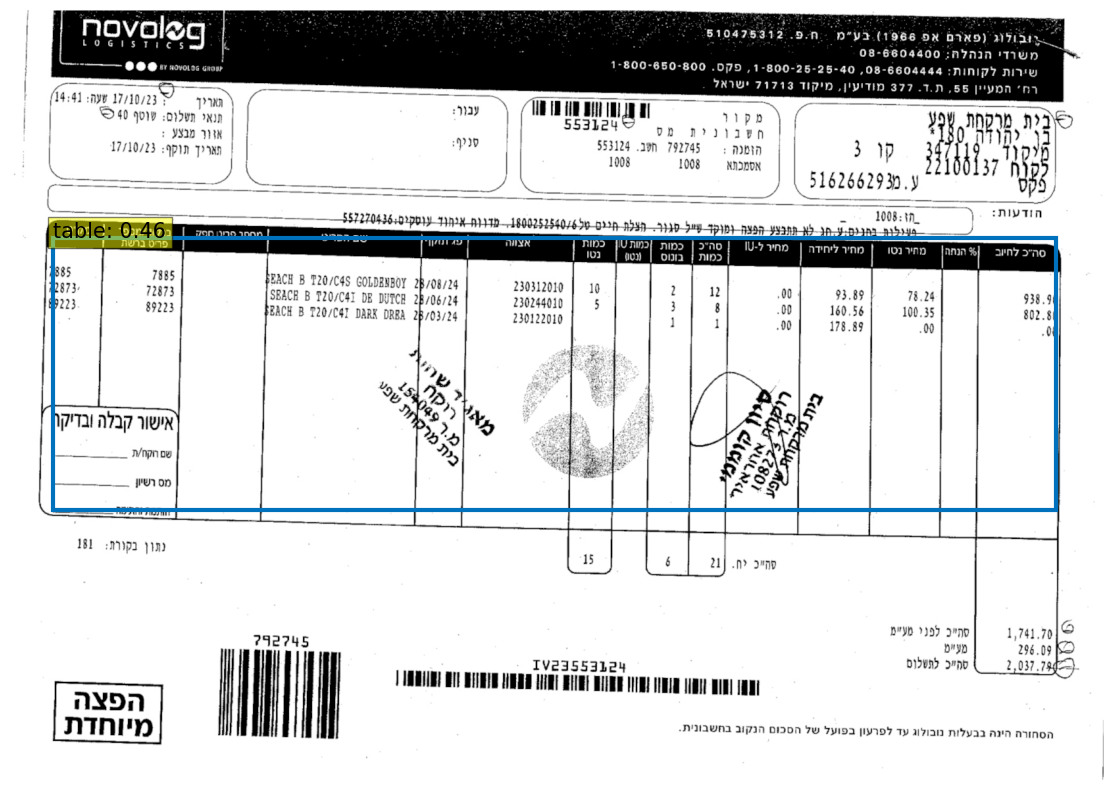

In [4]:
tblDec = TableDetect()
probas, boxes = tblDec.detectTables(img)
plot_results(tblDec.model, img, probas, boxes)


# Crop table with sam

checkpoint_load_scucess
shape (1201, 1706, 3)
------ total time: (s): 1.69


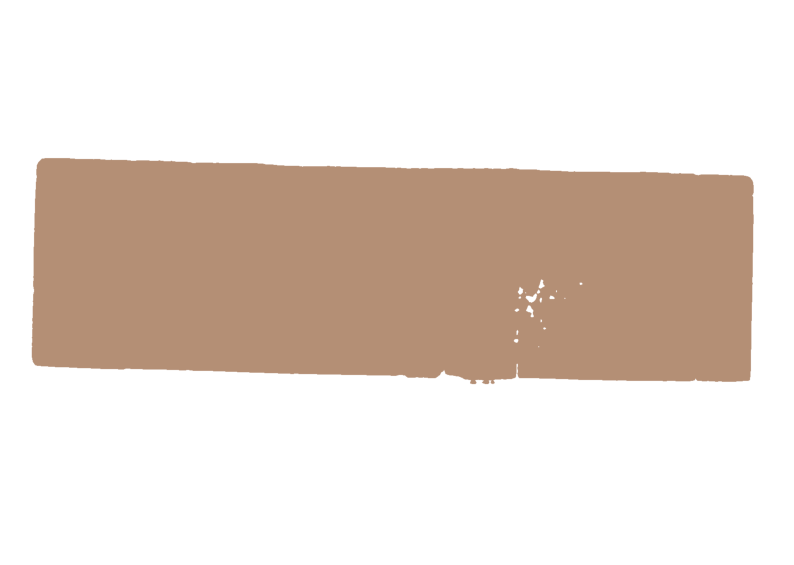

In [5]:
sam = MobileSamBoxes(img)
anns = sam.process(boxes)
plot_annotations(sam.image, anns)

In [6]:
w,h = img.size
mask = np.zeros((h,w, 1), np.uint8)
mask.shape

(1201, 1706, 1)

# align table

In [7]:
from tblDetect.AlignTable_Processor import AlignTable_Processor
alignTable_processor = AlignTable_Processor(img, anns[0])

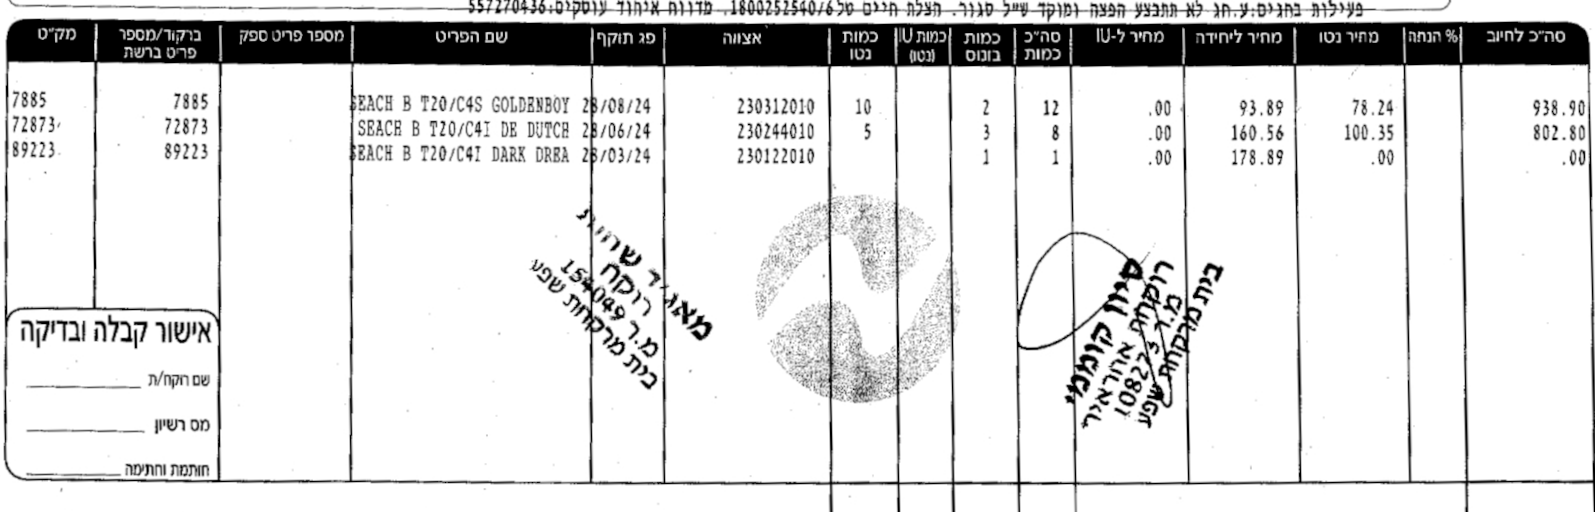

In [8]:
tbl_patch_pil = alignTable_processor.getAlignTable()
tbl_patch_pil


# Table structure recognition

In [9]:
def plot_results_cells(tbl_patch, cells, class_to_visualize):
    if class_to_visualize not in tblStructDetect.id2label.values():
      raise ValueError(f"Class should be one of the available classes {tblStructDetect.id2label}")

    plt.figure(figsize=(16,10))
    plt.imshow(tbl_patch)
    ax = plt.gca()

    for cell in cells:
        bbox = cell["bbox"]
        label = cell["label"]

        if label == class_to_visualize:
          xmin, ymin, xmax, ymax = tuple(bbox)

          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=np.random.random(3), linewidth=3))
          plt.axis('off')
          
from tblDetect.TblStructureDetect import TblStructureDetect
tblStructDetect = TblStructureDetect()          

In [10]:
cells = tblStructDetect.detectTableStructure(tbl_patch_pil)

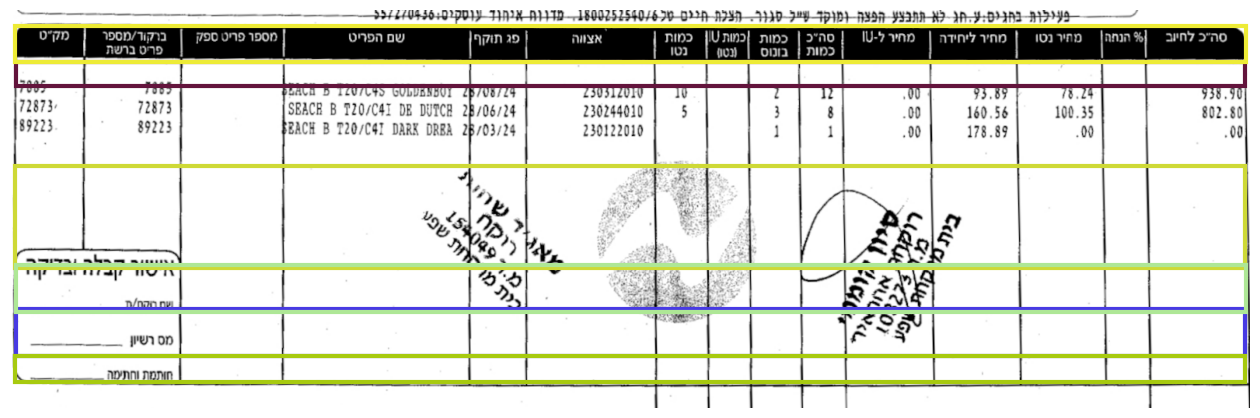

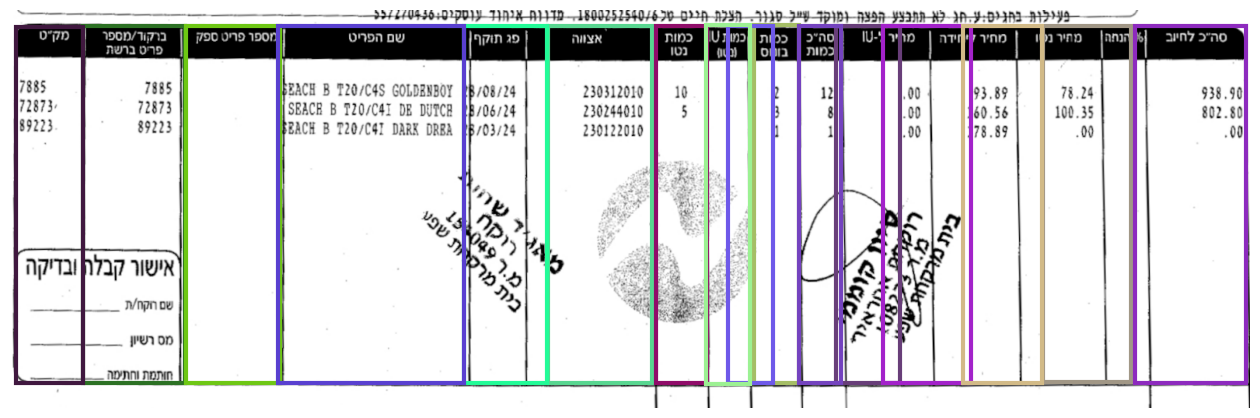

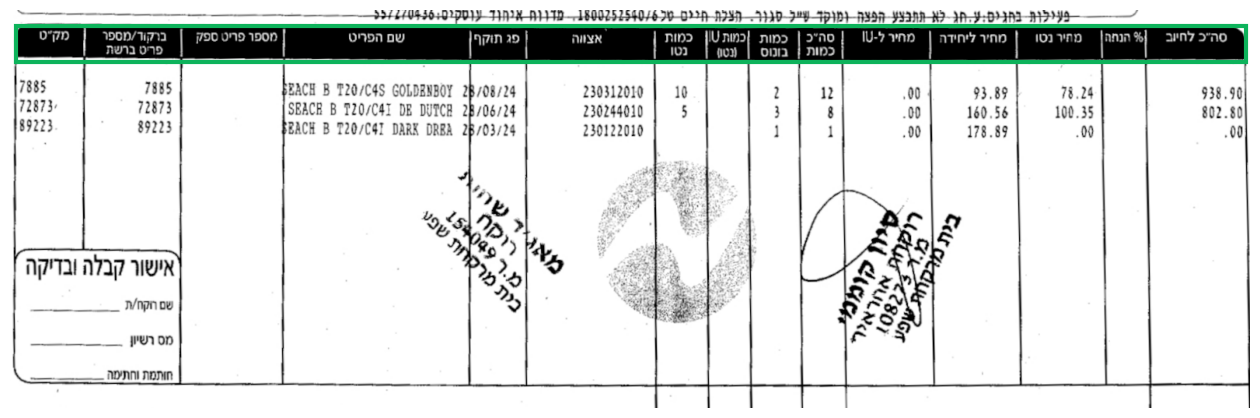

In [11]:
plot_results_cells(tbl_patch_pil,cells, class_to_visualize="table row")
plot_results_cells(tbl_patch_pil, cells, class_to_visualize="table column")
plot_results_cells(tbl_patch_pil,cells, class_to_visualize="table column header")

# Find the inverse rotate

In [12]:
rotated_cells =  alignTable_processor.unRotateAllCell(cells)
rotated_bbox = rotated_cells[0]['bbox']

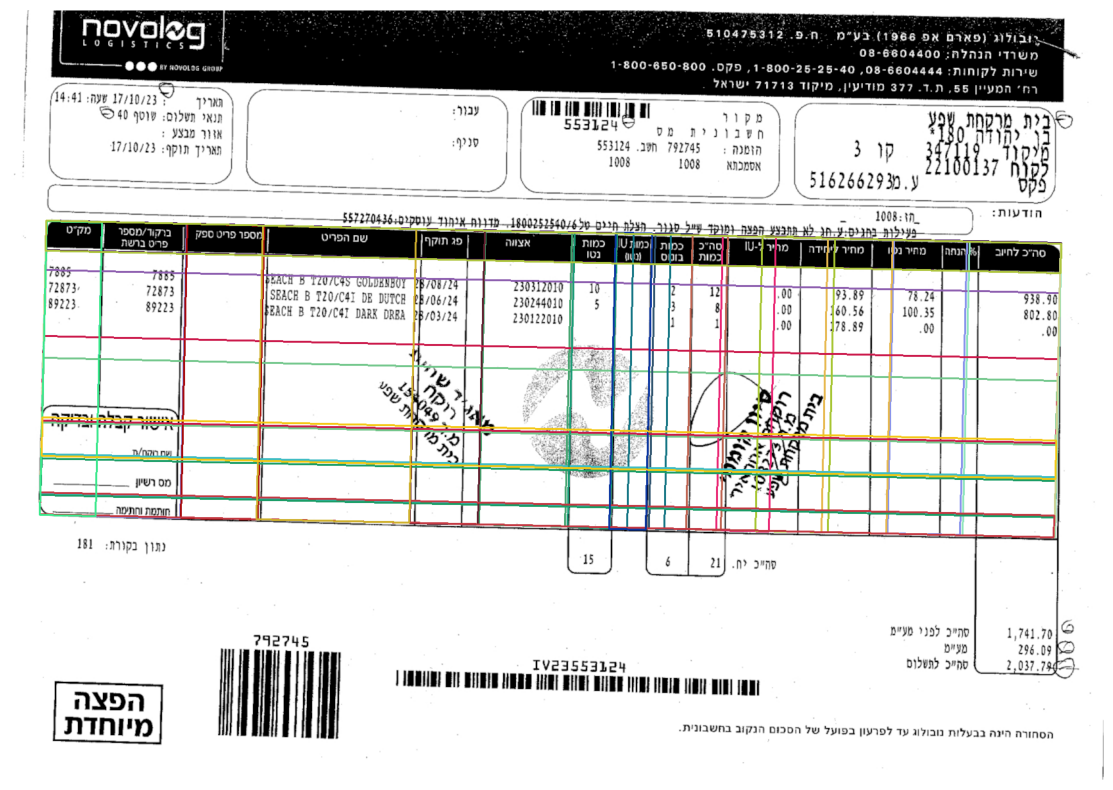

In [13]:

plot_rotatedResult(img, rotated_cells)